## TASK 2: Clean  the  dataset  replace  missing  values,  remove  outliers

In [44]:
## Data analysis phase

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## Display all the columns of the dataframe
pd.set_option("display.max_columns", None)

In [45]:
# CSV file name:
csv_filename = "dataset - netflix1.csv"

# Reading the CSV file into a Pandas DataFrame
df = pd.read_csv(csv_filename)

# Dispaying first five columns of dataset
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [46]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [47]:
## print shape of dataset with rows and columns
df.shape

(8790, 10)

In [48]:
# Checking column names
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [49]:
## print the top5 records
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [50]:
# Displaying summary statistics
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [51]:
## print the info on records
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [52]:
# Changing Datatype of date_added from object to datetime

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Verify the updated datatype
date_added_dtype = df['date_added'].dtype

# Display the updated datatype
print(f"The updated datatype of 'date_added' is: {date_added_dtype}")


The updated datatype of 'date_added' is: datetime64[ns]


In [53]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [54]:
## print the info on records after updating date_added datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [55]:
# Checking for duplicate values
 
df.duplicated().sum()

0

In [56]:
# Checking for missing values

df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

#### Here we can conclude that this dataset does not contain and missing or duplicate values

## Checking Numerical data

In [57]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  2


,date_added,release_year
0,2021-09-25,2020
1,2021-09-24,2021
2,2021-09-24,2021
3,2021-09-22,2021
4,2021-09-24,1993


In [58]:
numerical_features

['date_added', 'release_year']

## Checking Categorical Data

In [59]:
# list of categorical variables

categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features


['show_id',
 'type',
 'title',
 'director',
 'country',
 'rating',
 'duration',
 'listed_in']

In [60]:
df[categorical_features].head(5)

,show_id,type,title,director,country,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [61]:
# Use describe for all categorical columns
summary = df[categorical_features].describe(include='all')

# Display the summary for categorical columns
summary


,show_id,type,title,director,country,rating,duration,listed_in
count,8790,8790,8790,8790,8790,8790,8790,8790
unique,8790,2,8787,4528,86,14,220,513
top,s1,Movie,9-Feb,Not Given,United States,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6126,2,2588,3240,3205,1791,362


## Visualizing distribution of numerical data and removing outliers

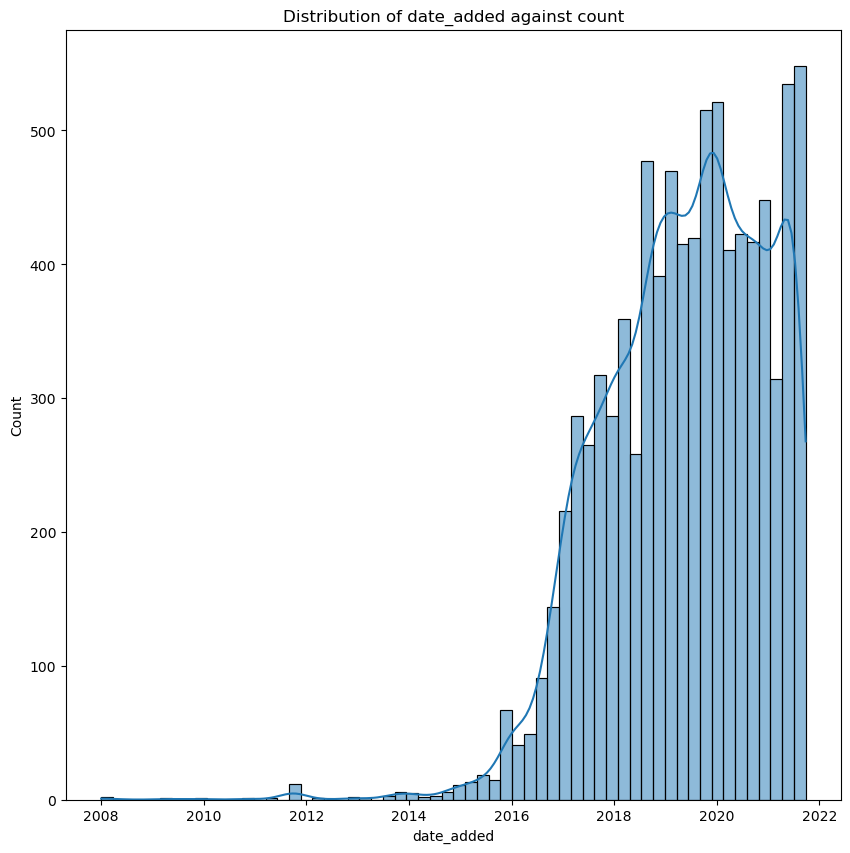

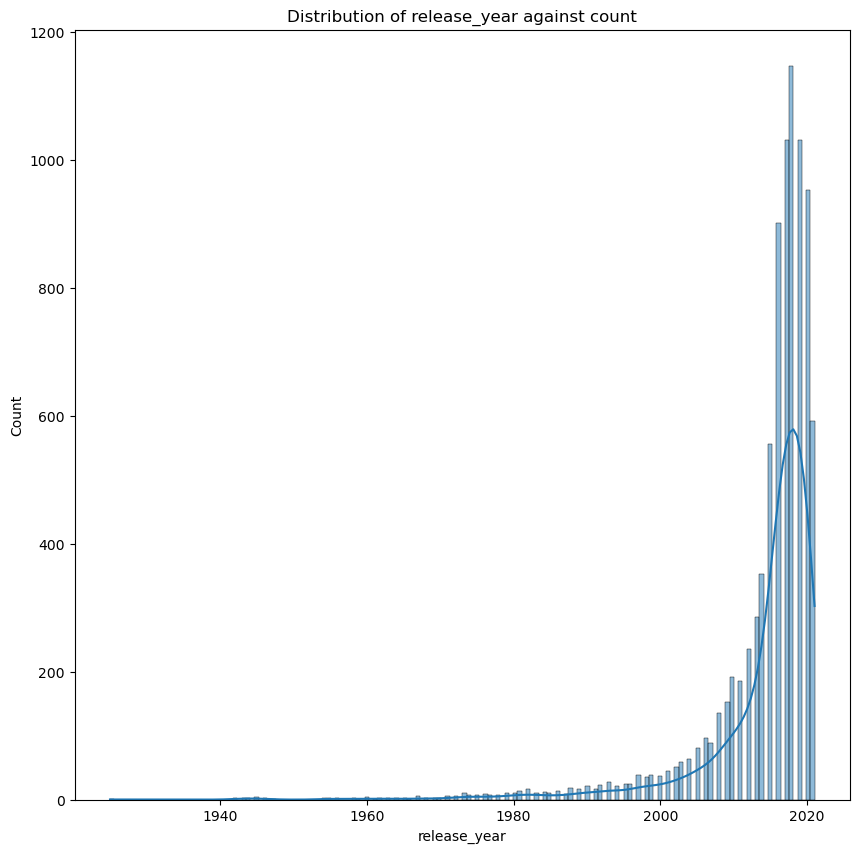

In [62]:
# Exploring the distribution of numerical features prior to outlier removal

# Exploring the distribution of numerical features
for col in numerical_features:
    plt.figure(figsize=(10, 10))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col} against count')
    plt.show()

In [63]:
# Removing outliers using z-score
from scipy.stats import zscore

z_scores = zscore(df.select_dtypes(include=[np.number]))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

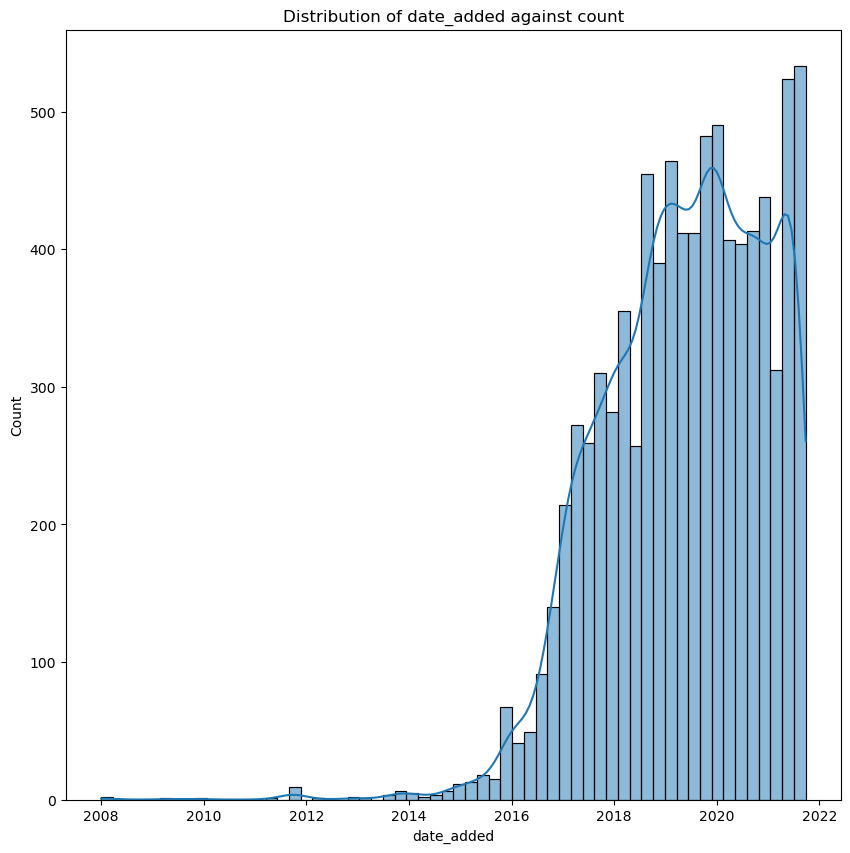

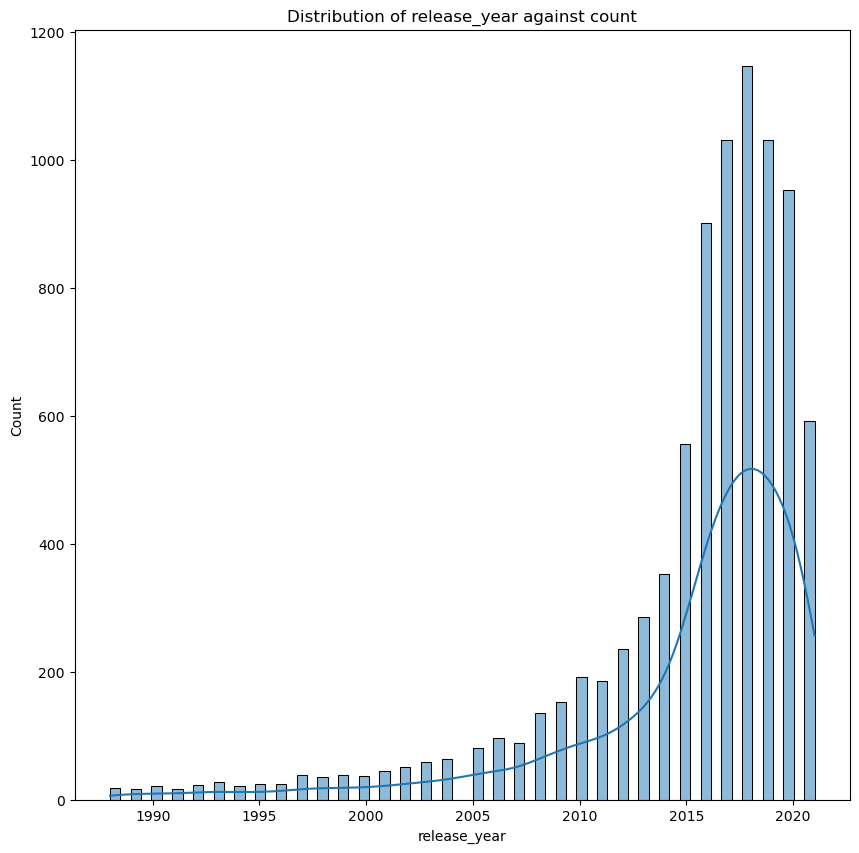

In [64]:
# Exploring the distribution of numerical features prior to outlier removal

# Exploring the distribution of numerical features
for col in numerical_features:
    plt.figure(figsize=(10, 10))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col} against count')
    plt.show()

### Here we can see removing outliers doesn't alter the distribution of "date_added" but it definitely impacts the distribution of "release_year"

In [65]:
# Now saving the cleaned dataset
df.to_csv('Cleaned_netflix_dataset.csv', index=False)